Sample size: (569, 30)
Target size: (569,)
Training set size: 455
Testing set size: 114
Model Accuracy: 0.9736842105263158
Confusion Matrix:
[[40  3]
 [ 0 71]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



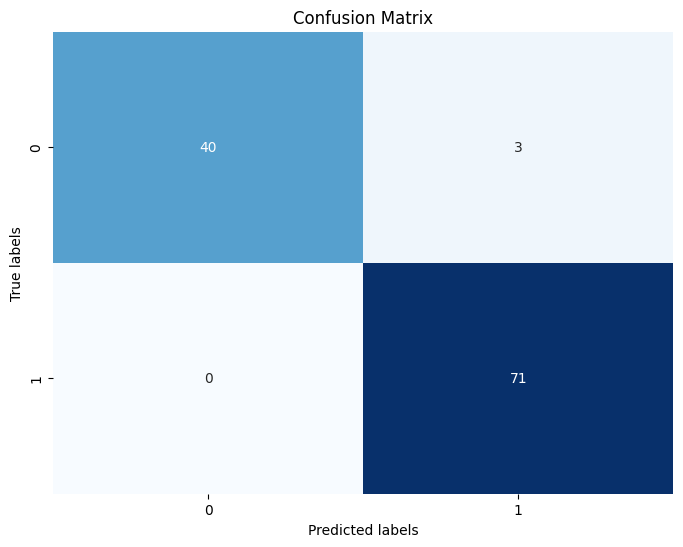

Cross-Validation Mean Accuracy: 0.9384711779448622
GaussianNB Mean Accuracy: 0.9384711779448622
KNeighborsClassifier Mean Accuracy: 0.9279135338345865
LogisticRegression Mean Accuracy: 0.950814536340852
SVC Mean Accuracy: 0.9191729323308271


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

breast_cancer = load_breast_cancer()

print("Sample size:", breast_cancer.data.shape)
print("Target size:", breast_cancer.target.shape)

X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

nb = GaussianNB()

nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print("Model Accuracy:", nb.score(X_test, y_test))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

kfold = KFold(n_splits=10, random_state=11, shuffle=True)
scores = cross_val_score(estimator=nb, X=breast_cancer.data, y=breast_cancer.target, cv=kfold)
print("Cross-Validation Mean Accuracy:", scores.mean())

estimators = {
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000),
    'SVC': SVC(gamma='scale')
}
for name, estimator in estimators.items():
    scores = cross_val_score(estimator, X=breast_cancer.data, y=breast_cancer.target, cv=kfold)
    print(f"{name} Mean Accuracy:", scores.mean())